# <center> REGRESSION LINEAIRE SIMPLE OU UNIVARIEE OU AJUSTEMENT AFFINE


## Table des matières

* [Partie 1 : Méthode analytique](#part1)
    * [Chapitre 1 : Avec NumPy](#chapter1)
        * [1.1 Calcul des paramètres](#section_1_1)
        * [1.2 Prédictions](#section_1_2)
        * [1.3 Complexité algorithmique](#section_1_3)
    * [Chapitre 2 : Avec Scikit-Learn](#chapter2)
        * [2.1 Calcul des paramètres](#section_2_1)
        * [2.2 Prédictions](#section_2_2)
        * [2.3 Classe LinearRegression](#section_2_3)
        * [2.4 Complexité algorithmique](#section_2_4)
    * [Chapitre 3 : Remarques](#chapter3)
* [Partie 2 : Approche d'optimisation itérative Descente de gradient (GD) ](#part2)
    * [Chapitre 1 : Descente de gradient ordinaire ou groupée batch gradient descent](#chapter2_1)
        * [1.1 Calcul des paramètres](#section2_1_1)
        * [1.2 Prédictions](#section2_1_2)
        * [1.3 Recherche du taux d'apprentissage](#section2_1_3)
    * [Chapitre 2 : Descente de gradient stochastique](#chapter2_2)
        * [2.1 Avec NumPy](#section2_2_1)
            * [2.1.1 Calcul des paramètres](#section2_2_1_1)
            * [2.1.2 Prédictions](#section2_2_1_2)
            * [2.1.3 Représentation graphique](#section2_2_1_3)
        * [2.2 Avec Scikit-Learn](#section2_2_2)
    * [Chapitre 3 : Descente de gradient par mini-lots](#chapter2_3)
        * [3.1 Calcul des paramètres](#section2_3_1)
        * [3.2 Représentation graphique](#section2_3_2)
    * [Chapitre 4 : Comparaison des descentes de gradient](#chapter2_4)

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)

Générons des données à l'allure linéaire.

In [2]:
X_train = 2 * np.random.rand(6, 1)
y_train = 4 + 3 * X_train + np.random.randn(6, 1)

In [3]:
X_train 

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904]])

In [4]:
y_train 

array([[ 7.82645353],
       [10.47172057],
       [ 7.92248926],
       [ 8.13451095],
       [ 4.47269415],
       [ 4.47023737]])

Text(0.5, 1.0, "Représentation graphique des données d'entraînement")

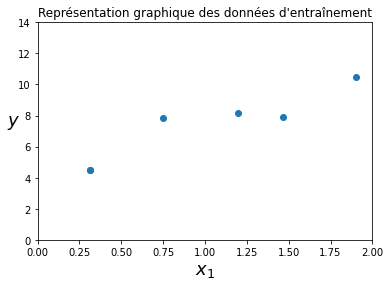

In [5]:
import matplotlib.pyplot as plt
plt.plot(X_train, y_train, 'o')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 14])
plt.title("Représentation graphique des données d'entraînement")

---
# <center> Partie 1 : Méthode analytique <a class="anchor" id="part1"></a>
---

---
## <center> Chapter 1 : Avec NumPy<a class="anchor" id="chapter1"></a>
---

### 1.1 Calcul des paramètres <a class="anchor" id="section_1_1"></a>

Calculons $\hat{\boldsymbol{\theta}}$ à l'aide de l'équation normale.

In [6]:
X_b = np.c_[np.ones((6,1)), X_train]
X_b

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904]])

In [7]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
theta_best

array([[3.84810858],
       [3.40464943]])

In [8]:
theta_best[0]

array([3.84810858])

In [9]:
theta_best[1]

array([3.40464943])

On a $$\hat{\boldsymbol{\theta}}=
\begin{pmatrix} \theta_0 \\ \theta_1 \end{pmatrix} =
\begin{pmatrix} \texttt{theta}\_\texttt{best[0]} \\ \texttt{theta}\_\texttt{best[1]} \end{pmatrix}=\texttt{theta}\_\texttt{best}$$

Le modèle linéaire est donc 
$$\hat{y}=\theta_0 + \theta_1 x= \texttt{theta}\_\texttt{best[0]}  + \texttt{theta}\_\texttt{best[1]}x_1 $$
ou encore
$$\hat{y}=\hat{\boldsymbol{\theta}} \cdot x= {}^t\hat{\boldsymbol{\theta}} x $$

**Remarque.** Nous avons utilisé la fonction $y=4+3x_0+\text{bruit gaussien}$ pour générer les données. Nous aurions aimé obtenir $\theta_0=4$ et $\theta_1=3$. C'est assez proche mais le bruit gaussien ne permet pas de retrouver les paramètres exacts de la fonction d'origine.

Text(0.5, 1.0, 'Représentation graphique du modèle')

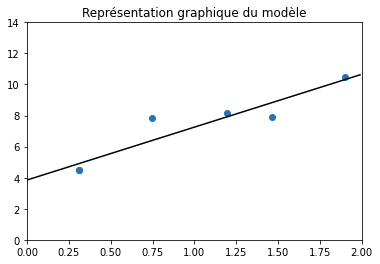

In [10]:
plt.plot(X_train, y_train, 'o')
x = np.arange(0, 2, 0.01) # np.shape(x) = (200,)
y = theta_best[0] + theta_best[1] * x # np.shape(y) = (200,)
plt.plot(x, y, "k")
plt.axis([0, 2, 0, 14])
plt.title('Représentation graphique du modèle')

### 1.2 Prédictions <a class="anchor" id="section_1_2"></a>

In [11]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.84810858],
       [10.65740744]])

- Pour $x=0$, le modèle prédit $\hat{y}=3.91902949$
- Pour $x=2$, le modèle prédit $\hat{y}=11.97426971$

Text(0.5, 1.0, 'Représentation graphique des prévisions')

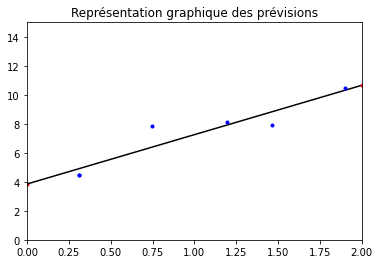

In [12]:
plt.plot(X_new, y_predict, "r.")
plt.plot(x, y, "k", label="Prédictions")
plt.plot(X_train, y_train, "b.")
plt.axis([0, 2, 0, 15])
plt.title('Représentation graphique des prévisions')

### 1.3 Complexité algorithmique <a class="anchor" id="section_1_3"></a>

L’équation normale calcule l’inverse de $X^TX$, qui est une matrice $(n+1) \times (n+1)$ (où $n$ est le nombre de variables). La complexité algorithmique d’une inversion de matrice se situe entre $O(n^{2,4})$ et $O(n^3)$, selon l’algorithme d’inversion utilisé. Autrement dit, si vous doublez le nombre de variables, le temps de calcul est multiplié par un facteur compris entre $2^{2,4} = 5,3$ et $2^3 = 8$.

---
## <center> Chapitre 2 : Avec Scikit-Learn <a class="anchor" id="chapter2"></a>
---

### 2.1 Calcul des paramètres <a class="anchor" id="section_2_2_1_1"></a>

In [13]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.intercept_, lin_reg.coef_ 

(array([3.84810858]), array([[3.40464943]]))

On a $$\hat{\boldsymbol{\theta}}=
\begin{pmatrix} \theta_0 \\ \theta_1 \end{pmatrix} =
\begin{pmatrix} \texttt{lin}\_\texttt{reg.intercept}\_ \\ \texttt{lin}\_\texttt{reg.coef}\_ \end{pmatrix}$$

Le modèle linéaire est donc 
$$\hat{y}=\theta_0 + \theta_1 x= \texttt{lin}\_\texttt{reg.intercept}\_ + \texttt{lin}\_\texttt{reg.coef}\_x_1 $$
ou encore
$$\hat{y}=\hat{\boldsymbol{\theta}} \cdot x= {}^t\hat{\boldsymbol{\theta}} x $$

In [14]:
lin_reg.intercept_

array([3.84810858])

In [15]:
lin_reg.coef_

array([[3.40464943]])

Text(0.5, 1.0, 'Représentation graphique du modèle')

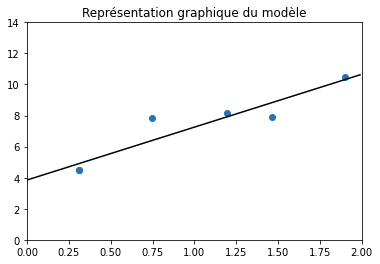

In [16]:
plt.plot(X_train, y_train, 'o')
x = np.arange(0, 2, 0.01)
y = lin_reg.intercept_ + lin_reg.coef_ * x # np.shape(y) = (1,200) 
# ou y = lin_reg.predict(x)
y = y.T # np.shape(200,)
plt.plot(x, y, "k")
plt.axis([0, 2, 0, 14])
plt.title('Représentation graphique du modèle')

### 2.2 Prédictions <a class="anchor" id="section_2_2"></a>

In [17]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = lin_reg.predict(X_new)
y_predict

array([[ 3.84810858],
       [10.65740744]])

- Pour $x=0$, le modèle prédit $\hat{y}=3.91902949$
- Pour $x=2$, le modèle prédit $\hat{y}=11.97426971$

Text(0.5, 1.0, 'Représentation graphique des prévisions')

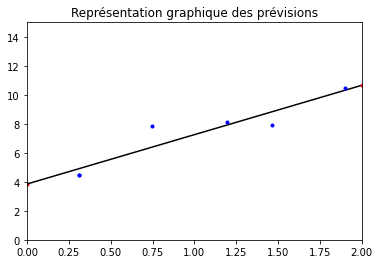

In [18]:
plt.plot(X_new, y_predict, "r.")
plt.plot(x, y, "k")
plt.plot(X_train, y_train, "b.")
plt.axis([0, 2, 0, 15])
plt.title('Représentation graphique des prévisions')

### 2.3 Classe LinearRegression <a class="anchor" id="section_2_3"></a>

La classe `LinearRegression` repose sur la fonction `scipy.linalg.lstsq()`. 

**Remarque.** La signification de `lstsq` est «least squares», c’est-à-dire (méthode des) «moindres carrés». 

In [19]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y_train, rcond=1e-6)
theta_best_svd

array([[3.84810858],
       [3.40464943]])

Cette fonction calcule $\hat{\theta} = X^†y$, où $X^†$ est le pseudo-inverse de Moore-Penrose de $X$. Vous pouvez utiliser `np.linalg.pinv()` pour calculer ce pseudo-inverse, si vous le souhaitez 

In [20]:
np.linalg.pinv(X_b).dot(y_train)

array([[3.84810858],
       [3.40464943]])

Ce pseudo-inverse est lui-même calculé à l’aide d’une technique très classique de factorisation de matrice nommée «décomposition en valeurs singulières» (ou SVD). Cette technique parvient à décomposer le jeu d’entraînement $X$ en produit de trois matrices $U$, $Σ$ et $V^T$ (voir `numpy.linalg.svd()`). Le pseudo-inverse se calcule ensuite ainsi : $X^†=VΣ^†U^T$. Pour calculer la matrice $Σ^†$, l’algorithme prend $Σ$ et met à zéro toute valeur plus petite qu’un seuil minuscule, puis il remplace les valeurs non nulles par leur inverse, et enfin il transpose la matrice. Cette approche est bien plus rapide que de calculer l’équation normale, et elle gère bien les cas limites : en effet, l’équation normale ne fonctionne pas lorsque la matrice $X^TX$ n’est pas inversible (notamment lorsque $m < n$ ou quand certains attributs sont redondants), alors que le pseudo-inverse est toujours défini.

### 2.4 Complexité algorithmique <a class="anchor" id="section_2_4"></a>

L’approche SVD utilisée par la classe `LinearRegression` de Scikit-Learn est environ $O(n^2)$. Si vous doublez le nombre de caractéristiques, vous multipliez le temps de calcul par environ $4$.

---
## <center> Chapter 3 : Remarques <a class="anchor" id="chapter3"></a>
---

L’équation normale et l’approche SVD deviennent toutes deux très lentes lorsque le nombre de caractéristiques devient grand (p. ex. 100 000). En revanche, les deux sont linéaires vis-à-vis du nombre d’ob-servations dans le jeu d’entraînement (algorithmes en $O(m)$), donc elles peuvent bien gérer un gros volume de données, à condition qu’il tienne en mémoire. 

Par ailleurs, une fois votre modèle de régression linéaire entraîné (en utilisant l’équation normale ou n’importe quel autre algorithme), obtenir une prédiction est extrêmement rapide : la complexité de l’algorithme est linéaire par rapport au nombre d’observations sur lesquelles vous voulez obtenir des prédictions et par rap-port au nombre de variables. Autrement dit, si vous voulez obtenir des prédictions sur deux fois plus d’observations (ou avec deux fois plus de variables), le temps de calcul sera grosso modo multiplié par deux.

La descente de gradient est une méthode d’entraînement de modèle de régression linéaire très différente, mieux adaptée au cas où il y a beaucoup de variables ou trop d’observations pour tenir en mémoire.

---
# <center> Partie 2 : Approche d'optimisation itérative Descente de gradient (GD) <a class="anchor" id="part2"></a>
---

---
## <center> Chapitre 1 : Descente de gadient ordinaire ou groupée *batch gradient descend* <a class="anchor" id="chapter2_1"></a>
---

### 1.1 Calcul des paramètres <a class="anchor" id="section2_1_1"></a>

In [21]:
eta = 0.1  # taux d’apprentissage
n_iterations = 1000
m = 6

theta = np.random.randn(2,1)  # initialisation aléatoirek
range(n_iterations)
for iteration in range(n_iterations):    
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y_train)    
    theta = theta - eta * gradients

In [22]:
theta

array([[3.84810858],
       [3.40464943]])

C’est exactement ce que nous avions obtenu avec l’équation normale ! La descente de gradient a parfaitement fonctionné. 

### 1.2 Prédictions <a class="anchor" id="section2_1_2"></a>

In [23]:
y_predict = X_new_b.dot(theta)
y_predict

array([[ 3.84810858],
       [10.65740744]])

### 1.3 Recherche du taux d'apprentissage <a class="anchor" id="section2_1_3"></a>

Mais que se serait-il passé avec un taux d’apprentissage différent ? La figure 4.8 présente les 10 premiers pas de la descente de gradient en utilisant trois taux d’apprentissage différents (la ligne hachurée représente le point de départ).

In [24]:
def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X_train, y_train, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "k-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y_train)
        theta = theta - eta * gradients
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

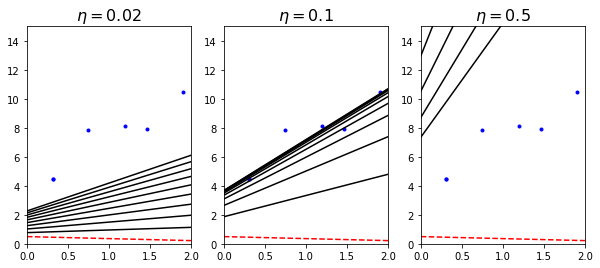

In [25]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

À gauche, le taux d’apprentissage est trop faible : l’algorithme aboutira au bout du compte à la solution, mais cela prendra très longtemps. Au milieu, le taux d’apprentissage semble assez bon : en quelques itérations seulement, l’algorithme a déjà convergé vers la solution. À droite, le taux d’apprentissage est trop haut, l’algorithme diverge, sautant ici et là et s’éloignant finalement de plus en plus de la solution à chaque étape.

---
## <center> Chapitre 2 : Descente de gadient stochastique <a class="anchor" id="chapter2_2"></a>
---

### 2.1 Avec NumPy <a class="anchor" id="section_2_2_1"></a>

#### 2.1.1 Calcul des paramètres <a class="anchor" id="section2_2_1_1"></a>

Ce code implémente une descente de gradient stochastique en utilisant un calendrier d’apprentissage très simple.

$$\forall i \in \{1,\dots{},\} \quad \eta_{n+1}=\frac{t_0}{(epoch \times m + i) + t_1}=\frac{5}{(epoch \times 6 + i) + 50}$$  

$$\texttt{X}\text{_}\texttt{b}=X=\begin{pmatrix} {}^t\boldsymbol{x}^{(1)} \\ \vdots \\ {}^t\boldsymbol{x}^{(\text{random_index})} \\ \vdots \\ {}^t\boldsymbol{x}^{(m)} \end{pmatrix}=\begin{pmatrix} {}^t\boldsymbol{x}^{(1)} \\ \vdots \\ \texttt{xi} \\ \vdots \\ {}^t\boldsymbol{x}^{(m)} \end{pmatrix}$$

$$\texttt{y}\text{_}\texttt{train}=\boldsymbol{y}=\begin{pmatrix} y^{(1)} \\ \vdots \\ y^{(\text{random_index})} \\ \vdots \\ y^{(m)} \end{pmatrix} = \begin{pmatrix} y^{(1)} \\ \vdots \\ \texttt{yi} \\ \vdots \\ y^{(m)} \end{pmatrix}$$

$$\texttt{gradients}=2 {}^t\texttt{xi}\left( \texttt{xi} \boldsymbol{\theta} - \texttt{yi} \right)$$

In [26]:
n_epochs = 50
t0, t1 = 5, 50  # hyperparam. d’échéancier d’apprent.

def learning_schedule(t):    
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # init. aléatoire

for epoch in range(n_epochs):    
    for i in range(m):        
        random_index = np.random.randint(m) # Au hasard dans {0,...,m-1} = {0,1,2,3,4,5} l'indice d'une des m=6 observations        
        xi = X_b[random_index:random_index+1]        
        yi = y_train[random_index:random_index+1]        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)        
        eta = learning_schedule(epoch * m + i)        
        theta = theta - eta * gradients

In [27]:
X_b[4:5]

array([[1.        , 0.31203728]])

In [28]:
theta

array([[3.9510864 ],
       [3.33451821]])

Alors que le code de la descente de gradient ordinaire effectue $1000$ fois plus d’itérations sur l’ensemble du jeu d’apprentissage, ce code-ci ne parcourt le jeu d’entraînement qu’environ $50$ fois et aboutit à une solution plutôt satisfaisante.

#### 2.1.2 Prédictions <a class="anchor" id="section2_2_1_2"></a>

#### 2.1.3 Représentation graphique <a class="anchor" id="section2_2_1_3"></a>

La figure 4.10 présente les 6 premières étapes de l’entraînement (notez l’irrégularité des pas).

In [29]:
m = len(X_b)

def plot_stochastic_gradient_descent(theta):
    plt.figure(figsize=(12,5))
    plt.plot(X_train, y_train, "b.")
    plt.axis([0, 2, 0, 15])
    for epoch in range(n_epochs): 
        for i in range(m):
            if epoch == 0: 
                y_predict = X_new_b.dot(theta)
                style = "k-" if i > 0 else "r--"
                plt.plot(X_new, y_predict, style)
            random_index = np.random.randint(m)        
            xi = X_b[random_index:random_index+1]        
            yi = y_train[random_index:random_index+1]        
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)        
            eta = learning_schedule(epoch * m + i)        
            theta = theta - eta * gradients

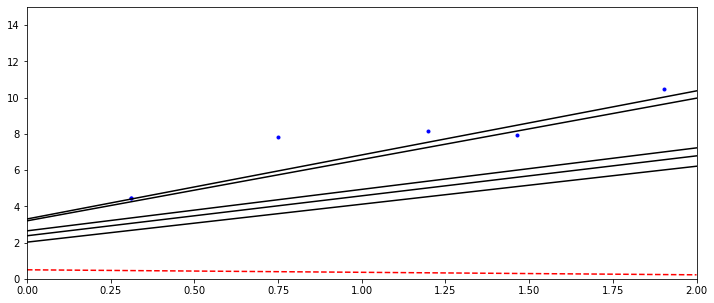

In [30]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plot_stochastic_gradient_descent(theta)

### 2.2 Avec Scikit-Learn <a class="anchor" id="section2_2_2"></a>

Pour effectuer avec Scikit-Learn une régression linéaire par descente de gradient stochastique (ou SGD), vous pouvez utiliser la classe `SGDRegressor`  qui par défaut optimise la fonction de coût du carré des erreurs. Le code suivant effectue au maximum 1000 cycles ou époques (`max_iter=1000`) ou tourne jusqu’à ce que la perte devienne inférieure à 0,001 durant une époque (`tol=1e-3`). Il commence avec un taux d’apprentissage de 0,1 (`eta0=0.1`), en utilisant le calendrier d’apprentissage par défaut (différent de celui ci-dessus). À la fin, il n’effectue aucune régularisation (`penalty=None`).

In [31]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_train, y_train.ravel())

SGDRegressor(eta0=0.1, penalty=None)

Là encore, vous obtenez une solution assez proche de celle donnée par l’équation normale.

In [32]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.69946363]), array([3.50638036]))

---
## <center> Chapitre 3 : Descente de gradient par mini-lots <a class="anchor" id="chapter2_3"></a>
---

### 3.1 Calcul des paramètres <a class="anchor" id="section2_3_1"></a>

In [33]:
n_epochs = 50
minibatch_size = 2

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices] # Permutation des lignes de X_b
    y_shuffled = y_train[shuffled_indices] # Permutation des lignes de y
    for i in range(0, m, minibatch_size): # Pour i appartenant à {0,2,4} (0 à 5 avec pas de 2)
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients

In [34]:
theta

array([[3.92952095],
       [3.36233929]])

### 3.2 Représentation graphique <a class="anchor" id="section2_3_2"></a>

In [35]:
def plot_minibatch_gradient_descent(theta):
    plt.figure(figsize=(12,5))
    plt.plot(X_train, y_train, "b.")
    plt.axis([0, 2, 0, 15])
    t=0 
    for epoch in range(n_epochs): 
        huffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices] # Permutation des lignes de X_b
        y_shuffled = y_train[shuffled_indices] # Permutation des lignes de y
        for i in range(0, m, minibatch_size): # Pour i appartenant à {0,2,4} (0 à 5 avec pas de 2)
            if epoch == 0 or epoch ==1: 
                y_predict = X_new_b.dot(theta)
                style = "k-" if i > 0 else "r--"
                plt.plot(X_new, y_predict, style)
            t += 1
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(t)
            theta = theta - eta * gradients

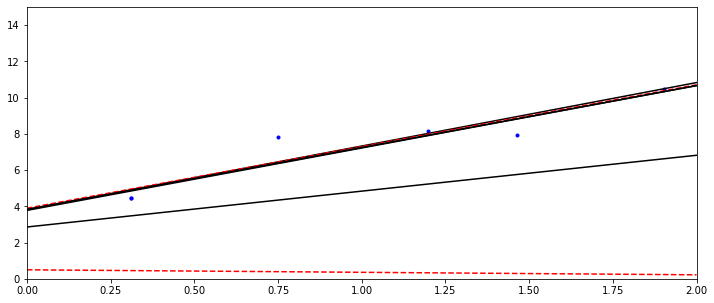

In [36]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization


plot_minibatch_gradient_descent(theta)

---
## <center> Chapitre 4 : Comparaison des descentes de gradient <a class="anchor" id="chapter2_4"></a>
---

In [37]:
theta_path_bgd = []

eta = 0.1  # taux d’apprentissage
n_iterations = 1000
m = 6

theta = np.random.randn(2,1)  # initialisation aléatoire
range(n_iterations)
for iteration in range(n_iterations):    
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y_train)    
    theta = theta - eta * gradients
    theta_path_bgd.append(theta)

In [38]:
theta_path_bgd

[array([[1.73252744],
        [1.57685255]]),
 array([[2.517294  ],
        [2.47969375]]),
 array([[2.96646988],
        [2.9880647 ]]),
 array([[3.22522363],
        [3.27287527]]),
 array([[3.37587363],
        [3.43103186]]),
 array([[3.46510056],
        [3.51747924]]),
 array([[3.5193775 ],
        [3.56336902]]),
 array([[3.55371925],
        [3.58636163]]),
 array([[3.5766433 ],
        [3.59646776]]),
 array([[3.59298292],
        [3.59936063]]),
 array([[3.60548224],
        [3.5982541 ]]),
 array([[3.61570063],
        [3.59496759]]),
 array([[3.62452561],
        [3.59052998]]),
 array([[3.63246363],
        [3.58552192]]),
 array([[3.63980495],
        [3.58027005]]),
 array([[3.64671714],
        [3.57495703]]),
 array([[3.65329814],
        [3.56968397]]),
 array([[3.65960628],
        [3.5645058 ]]),
 array([[3.66567734],
        [3.55945139]]),
 array([[3.67153427],
        [3.55453484]]),
 array([[3.6771926],
        [3.549762 ]]),
 array([[3.68266363],
        [3.545

In [39]:
theta_path_sgd = []

n_epochs = 50
t0, t1 = 5, 50  # hyperparam. d’échéancier d’apprent.

#def learning_schedule(t):    
#    return t0 / (t + t1)

theta = np.random.randn(2,1)  # init. aléatoire

for epoch in range(n_epochs):    
    for i in range(m):        
        random_index = np.random.randint(m) # Au hasard dans {0,...,m-1} = {0,1,2,3,4,5} l'indice d'une des m=6 observations        
        xi = X_b[random_index:random_index+1]        
        yi = y_train[random_index:random_index+1]        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)        
        eta = learning_schedule(epoch * m + i)        
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

In [40]:
theta_path_mgd = []

n_epochs = 50
minibatch_size = 2

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
#def learning_schedule(t):
#    return t0 / (t + t1)

t = 0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices] # Permutation des lignes de X_b
    y_shuffled = y_train[shuffled_indices] # Permutation des lignes de y
    for i in range(0, m, minibatch_size): # Pour i appartenant à {0,2,4} (0 à 5 avec pas de 2)
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

(2.0, 5.5, 0.5, 5.5)

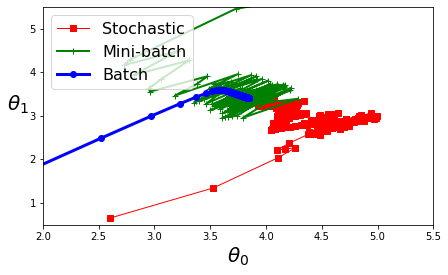

In [41]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2, 5.5, 0.5, 5.5])

In [42]:
theta_path_bgd

array([[[1.73252744],
        [1.57685255]],

       [[2.517294  ],
        [2.47969375]],

       [[2.96646988],
        [2.9880647 ]],

       ...,

       [[3.84810858],
        [3.40464943]],

       [[3.84810858],
        [3.40464943]],

       [[3.84810858],
        [3.40464943]]])

In [43]:
theta_path_bgd.shape

(1000, 2, 1)

In [44]:
theta_path_bgd[:, 0]

array([[1.73252744],
       [2.517294  ],
       [2.96646988],
       [3.22522363],
       [3.37587363],
       [3.46510056],
       [3.5193775 ],
       [3.55371925],
       [3.5766433 ],
       [3.59298292],
       [3.60548224],
       [3.61570063],
       [3.62452561],
       [3.63246363],
       [3.63980495],
       [3.64671714],
       [3.65329814],
       [3.65960628],
       [3.66567734],
       [3.67153427],
       [3.6771926 ],
       [3.68266363],
       [3.68795614],
       [3.69307741],
       [3.69803383],
       [3.70283117],
       [3.70747481],
       [3.71196982],
       [3.71632104],
       [3.72053313],
       [3.72461056],
       [3.72855765],
       [3.73237858],
       [3.73607738],
       [3.73965796],
       [3.7431241 ],
       [3.74647946],
       [3.74972758],
       [3.75287188],
       [3.7559157 ],
       [3.75886223],
       [3.76171459],
       [3.76447579],
       [3.76714873],
       [3.76973625],
       [3.77224107],
       [3.77466584],
       [3.777

In [45]:
theta_path_bgd[:, 0].shape

(1000, 1)